<span style="font-family: Arial; font-weight:bold;font-size:3.0em;color:#0e92ea"> AllLife Bank Customer Segmentation </h1></center>

# Description

## Background and Context

Data Analysis for "Visit with us" company to enable and establish a viable business model to expand the customer base. A viable business model is a central concept that helps us understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

The company in the last campaign contacted the customers at random without looking at the available information. However, this time company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being, and wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

As a Data Scientist at the "Visit with us" travel firm, a study is done on consumer data and information in order to make recommendations to the Policy Maker and Marketing Team, as well as develop a model to anticipate who will buy the newly launched vacation package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

Customer details:

* CustomerID: Unique customer ID 
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

## Customer interaction data: 

PitchSatisfactionScore: Sales pitch satisfaction score <br>
ProductPitched: Product pitched by the salesperson <br>
NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch <br>
DurationOfPitch: Duration of the pitch by a salesperson to the customer <br>

## Importing and installing Libraries

In [8]:
!pip install xgboost
!pip install xlrd
!pip install openpyxl

import scipy.stats as stats 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

import statsmodels.api as sm

#--Sklearn library--
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# Library to tune model
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix 

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)

pd.set_option('display.float_format', lambda x: '%.5f' % x) 
warnings.filterwarnings('ignore') 
 
plt.style.use('ggplot')

## Data

In [10]:
df=pd.read_csv("Tourism.csv")

data=df.copy()
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns')

There are 4888 rows and 20 columns


In [11]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.00000,Self Enquiry,3,6.00000,Salaried,Female,3,3.00000,Deluxe,3.00000,Single,1.00000,1,2,1,0.00000,Manager,20993.00000
1,200001,0,49.00000,Company Invited,1,14.00000,Salaried,Male,3,4.00000,Deluxe,4.00000,Divorced,2.00000,0,3,1,2.00000,Manager,20130.00000
2,200002,1,37.00000,Self Enquiry,1,8.00000,Free Lancer,Male,3,4.00000,Basic,3.00000,Single,7.00000,1,3,0,0.00000,Executive,17090.00000
3,200003,0,33.00000,Company Invited,1,9.00000,Salaried,Female,2,3.00000,Basic,3.00000,Divorced,2.00000,1,5,1,1.00000,Executive,17909.00000
4,200004,0,nan,Self Enquiry,1,8.00000,Small Business,Male,2,3.00000,Basic,4.00000,Divorced,1.00000,0,5,1,0.00000,Executive,18468.00000


In [12]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.00000,Self Enquiry,3,9.00000,Small Business,Male,3,5.00000,Deluxe,4.00000,Unmarried,2.00000,1,1,1,1.00000,Manager,26576.00000
4884,204884,1,28.00000,Company Invited,1,31.00000,Salaried,Male,4,5.00000,Basic,3.00000,Single,3.00000,1,3,1,2.00000,Executive,21212.00000
4885,204885,1,52.00000,Self Enquiry,3,17.00000,Salaried,Female,4,4.00000,Standard,4.00000,Married,7.00000,0,1,1,3.00000,Senior Manager,31820.00000
4886,204886,1,19.00000,Self Enquiry,3,16.00000,Small Business,Male,3,4.00000,Basic,3.00000,Single,3.00000,0,5,0,2.00000,Executive,20289.00000
4887,204887,1,36.00000,Self Enquiry,1,14.00000,Salaried,Male,4,4.00000,Basic,4.00000,Unmarried,3.00000,1,3,1,2.00000,Executive,24041.00000


In [16]:
print ("Columns : \n\n", data.columns.tolist()) 
print ("*"*120,"\nMissing values :\n\n", data.isnull().sum().sort_values(ascending=False))
print( "*"*120,"\nPercentage of missing :\n\n", round(data.isna().sum() / data.isna().count() * 100, 2).sort_values(ascending=False)) 

Columns : 

 ['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']
************************************************************************************************************************ 
Missing values :

 DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Passport                      0
MaritalStatus                 0
ProductPitched                0
Designation                   0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
PitchSatisfactionScore     

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.00000,202443.50000,1411.18839,200000.00000,201221.75000,202443.50000,203665.25000,204887.00000
ProdTaken,4888.00000,0.18822,0.39092,0.00000,0.00000,0.00000,0.00000,1.00000
Age,4662.00000,37.62227,9.31639,18.00000,31.00000,36.00000,44.00000,61.00000
CityTier,4888.00000,1.65426,0.91658,1.00000,1.00000,1.00000,3.00000,3.00000
DurationOfPitch,4637.00000,15.49083,8.51964,5.00000,9.00000,13.00000,20.00000,127.00000
NumberOfPersonVisiting,4888.00000,2.90507,0.72489,1.00000,2.00000,3.00000,3.00000,5.00000
NumberOfFollowups,4843.00000,3.70845,1.00251,1.00000,3.00000,4.00000,4.00000,6.00000
PreferredPropertyStar,4862.00000,3.58104,0.79801,3.00000,3.00000,3.00000,4.00000,5.00000
NumberOfTrips,4748.00000,3.23652,1.84902,1.00000,2.00000,3.00000,4.00000,22.00000
Passport,4888.00000,0.29092,0.45423,0.00000,0.00000,0.00000,1.00000,1.00000


### Inference
- The features of the dataset are: 
*'CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'
- We can drop the customer ID column

- The proportion of **missing values** is less.
    DurationOfPitch has 251 missing values that is 5% of values
    MonthlyIncome has 233 missing values that is 4.77% of values
    Age has 226 missing values that is 4.62% of values
    Number of trips, NumberOfChildrenVisiting,NumberOfFollowups,NumberOfTrips,PreferredPropertyStar,TypeofContact has less than 3% missing values
    
- From the problem we can understand that the target variable is *ProdTaken* 
- There are some columns that need to be converted to categorical values from object: TypeofContact, CityTier, Occupation,Gender,ProductPitched,MaritalStatus,Passport,Designation,OwnCar,ProductPitched


- Age has a mean value of 37 and median of 36. In the dataset the least age is 18 and the highest is 61.
- An Average duration of pitch is 15 mins but it can go upto a maximum of 127 mins.
- NumberOfFollowups, there is an average follow up of 4 times.
- The average income is around 22k to 23k considering the mean and median.

## Data Preprocessing

In [19]:
#dropping CustomerID column
data.drop(['CustomerID'],axis=1,inplace=True)

In [20]:
cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport','CityTier','MaritalStatus','ProductPitched',
            'Gender','Occupation','TypeofContact']

In [21]:
for i in cat_cols:
    print('Unique values in',i, 'are')
    print(data[i].value_counts())
    print('*'*120)

Unique values in Designation are
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
************************************************************************************************************************
Unique values in ProdTaken are
0    3968
1     920
Name: ProdTaken, dtype: int64
************************************************************************************************************************
Unique values in OwnCar are
1    3032
0    1856
Name: OwnCar, dtype: int64
************************************************************************************************************************
Unique values in Passport are
0    3466
1    1422
Name: Passport, dtype: int64
************************************************************************************************************************
Unique values in CityTier are
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
************

### Inference:
* The unique values in designation are- Executive, Manager,Senior Manager,AVP, and VP.
* ProdTaken and Owncar has only 2 categories.
* In the Marital status there is Single and Unmarried which means its different, it could mean that unmarried means having a partner, will need to look into it.
* *Female* and *Fe male* are same category , Data needs to be fixed
* 3 star property is prefered by customers
* Most of the customers are from Tier1 cities and least from Tier2

In [22]:
#Female and Fe male are two category in dataset , changing all to Female
data.Gender.value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [23]:
data['Gender'] = data['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)

In [24]:
data.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [25]:
# Converting the data type of categorical features to 'category'

cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact']
data[cat_cols] = data[cat_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [26]:
data.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
Designation,4888,5,Executive,1842


In [27]:
# We can try to convert age into bin sizes
data.Age.describe()

count   4662.00000
mean      37.62227
std        9.31639
min       18.00000
25%       31.00000
50%       36.00000
75%       44.00000
max       61.00000
Name: Age, dtype: float64

In [28]:
#Since the age ranges from 18 to 61, we can groups into: '18-25','26-30', '31-40', '41-50', '51-65
data['Agebin'] = pd.cut(data['Age'], bins = [18,25, 31, 40, 50, 65], labels = ['18-25','26-30', '31-40', '41-50', '51-65'])

In [30]:
data.Agebin.value_counts()

31-40    1722
41-50    1073
26-30     971
51-65     549
18-25     333
Name: Agebin, dtype: int64

In [31]:
# Let's try to categorize customers in terms of their income
data.MonthlyIncome.describe()

count    4655.00000
mean    23619.85349
std      5380.69836
min      1000.00000
25%     20346.00000
50%     22347.00000
75%     25571.00000
max     98678.00000
Name: MonthlyIncome, dtype: float64

In [32]:
data['Incomebin'] = pd.cut(data['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

In [33]:
data.Incomebin.value_counts()

<25000     2257
<20000     1038
<30000      768
<35000      382
<40000      206
<100000       2
<15000        2
<50000        0
<45000        0
Name: Incomebin, dtype: int64

******************************************************************************************************************************

## Exploratory Data Analysis

### Univariate Analysis

In [35]:
def diff_plots(data):
    fig, axes =plt.subplots(1,3,figsize=(20, 5))
    Name=data.name.upper()
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=15, fontweight='bold')
    sns.distplot(data,kde=True,color='Blue',ax=axes[0])
    axes[0].axvline(data.mean(), color='b', linestyle='--',linewidth=2)
    axes[0].axvline(data.median(), color='r', linestyle='solid', linewidth=2)
    axes[0].axvline(data.mode()[0],color='g',linestyle='dashed',linewidth=2)
    axes[0].legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})
    sns.boxplot(x=data,showmeans=True, orient='h',color="purple",ax=axes[1])
    sns.violinplot(data,ax=axes[2],showmeans=True)

In [1]:
list_col=  data.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    diff_plots(df[list_col[i]])

NameError: name 'df' is not defined

### Inferences

- Age is normally distrubted  and doesn't seem to have any outliers. It has a slightly right skewed data.
- Duration of pitch is heavily right skewed we observe some outliers  greater than 120. This might be ther reason for the change in mean(15) vs the median (13).
- Number of visitors is usually 3 and with  2 and 4 sharing the next most frequent numbers. There are some outliers in the data which might need checking.
- We had seen that the mean and median of follow ups tends to 4 and we can see a similar result graphically.
- Number of trips is right skewed with some outliers where trips are greater than 17. But usually the no. of trips is less with an average of 3.
- Monthly income is Right skewed. and has some outlier as higher end.


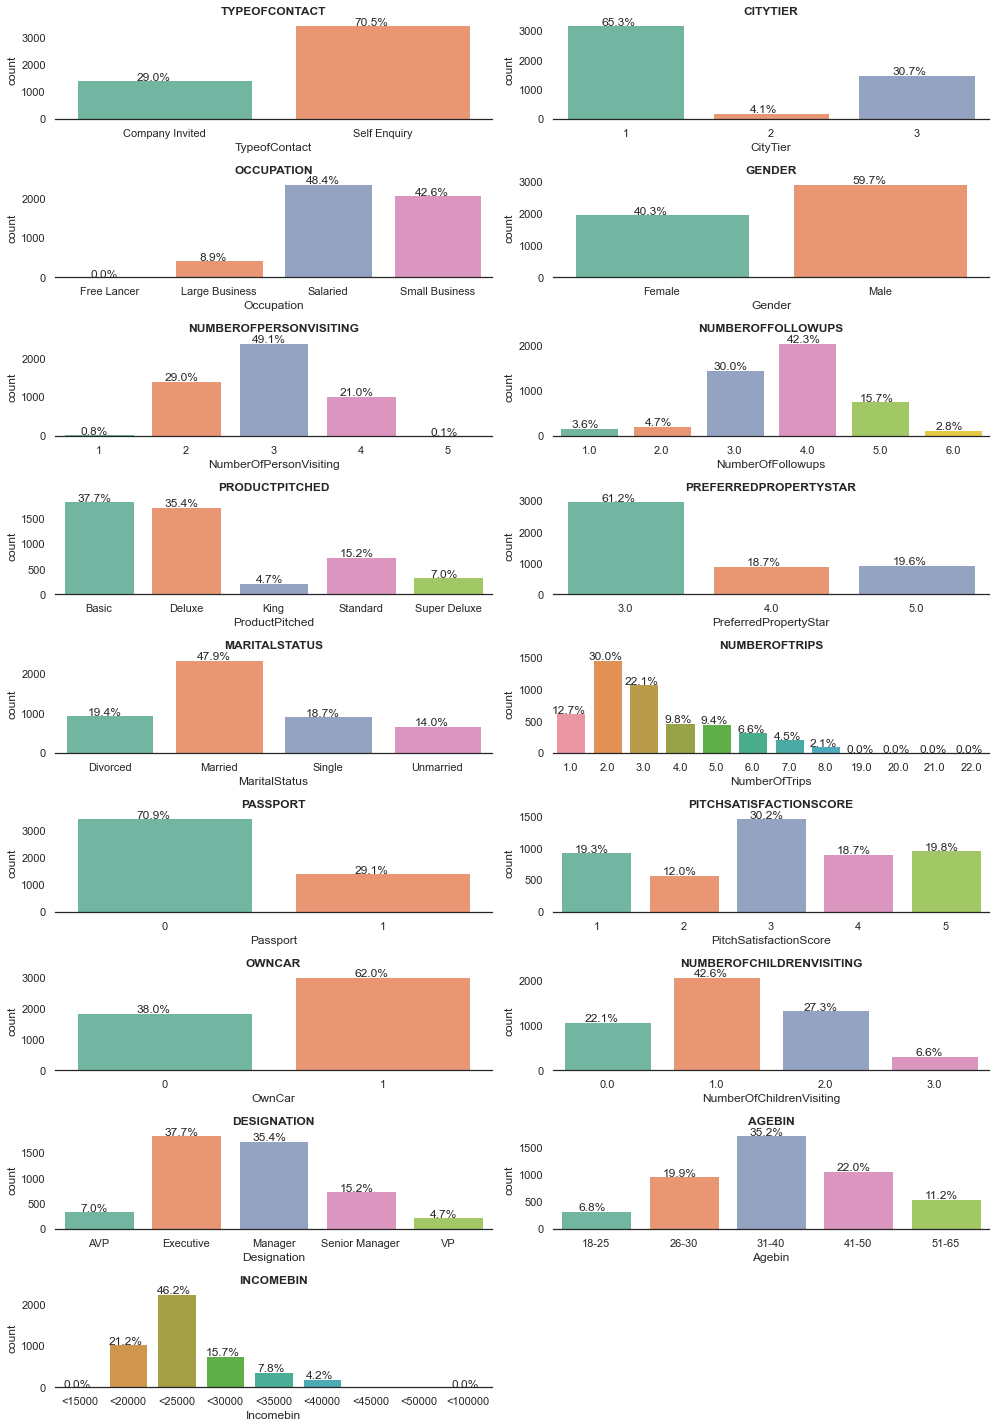

In [38]:
# Ckecking categorical values

plt.figure(figsize=(14,20))

sns.set_theme(style="white") 
cols=['TypeofContact', 'CityTier', 'Occupation', 'Gender',
        'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 
        'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips',
        'Passport', 'PitchSatisfactionScore',
        'OwnCar', 'NumberOfChildrenVisiting', 
        'Designation','Agebin','Incomebin']
for i, variable in enumerate(cols):
                     plt.subplot(9,2,i+1)
                     order = data[variable].value_counts(ascending=False).index   
                     
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=data[variable], data=data )
                     sns.despine(top=True,right=True,left=True) 
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(data[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(cols[i].upper(),fontweight='bold')
                                     


### Inference:
* We observe that 30% customers come with company invitation and 70% come with a self enquiry.
* Most of the people are from Tier 1 (65.3%).
* The highest occupation category is in Salaried (48.4%) followed by small business owners (42.6%).
* 37.7% works in Executive level, followed by 35.4% of Managers and they both come under the Salaried category of Occupation.
* The population has a higher count of males (59.7%).
* In the population most of the people are married (47.9%).
* Surprisingly most of the people do not have a passport (71%).
* Most of them do own a car (62%).
* Most of them are in the age group of 31-40 with 35.2%. Most customer are in 26-50 age range.
* The majority of customers' monthly income is in the region of 20,000 to 25,000. The majority of customers have a monthly salary of between 15,000 and 30,000.

### Bivariate & Multivariate Analysis

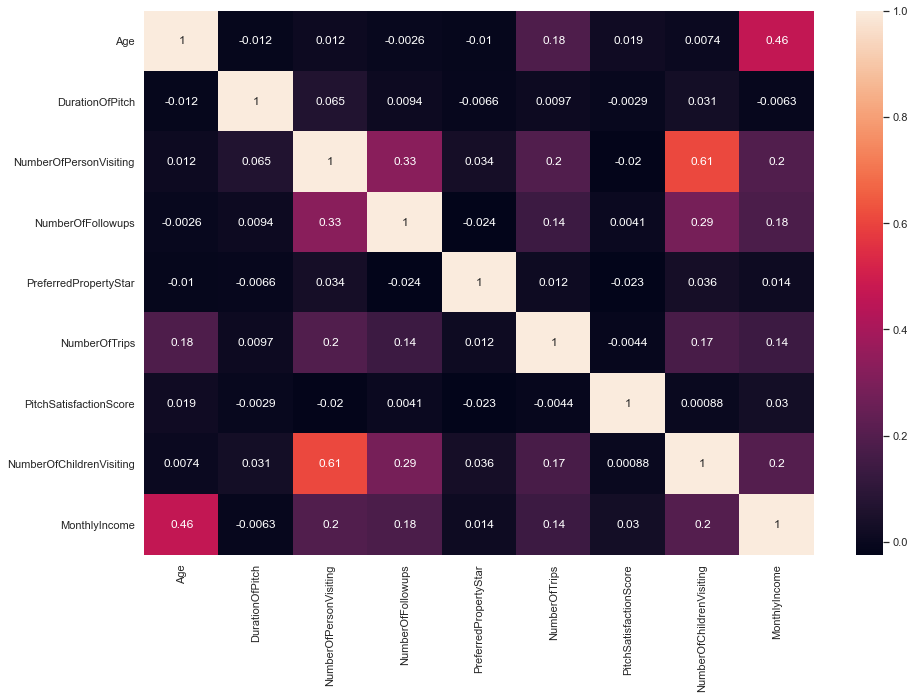

In [40]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Inference
- Monthlyincome and Age has a 0.46 weak correlation
- Number of children visiting and number of person visiting has a 0.61 which is a stronger relation.
- Numberof follow up and number of person visiting  has very weak correlation.

********************************************************************************************************************************

In [50]:
def plot(x,target='ProdTaken'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x} \n of a customer who had Not taken Product',fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x}\n of a customer who had taken Product",fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Product taken',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Product Taken - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    plt.tight_layout(pad=4)
    plt.show()

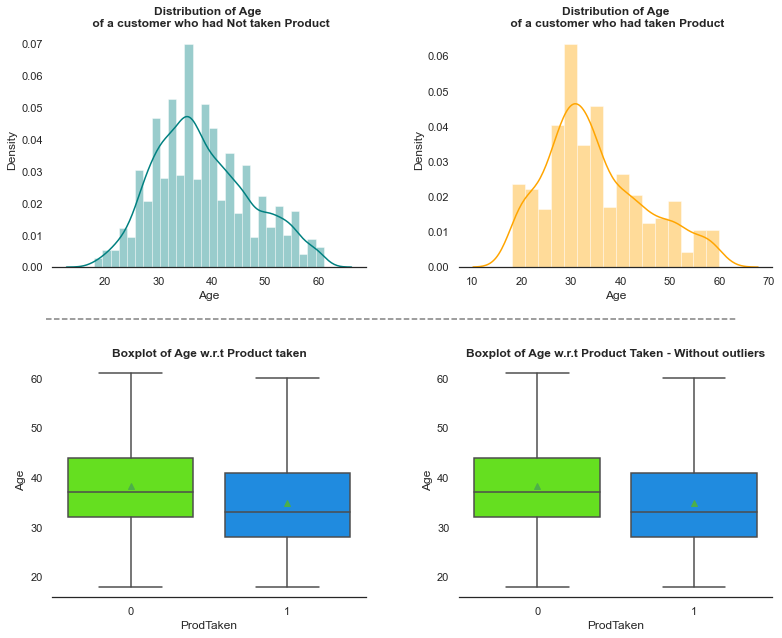

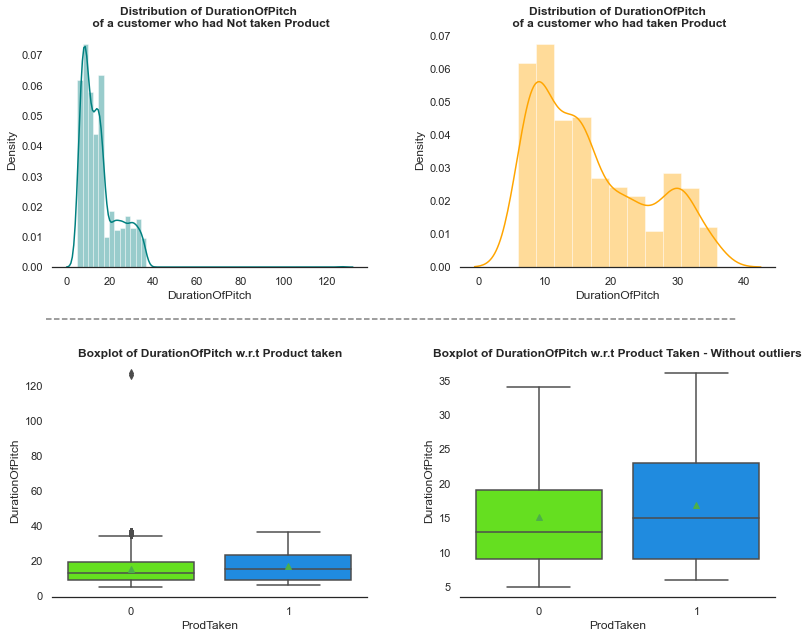

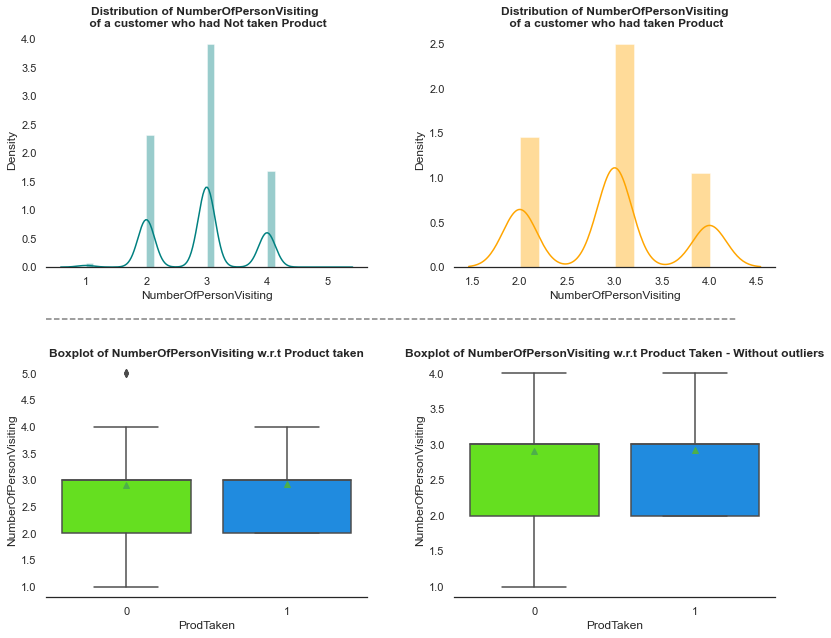

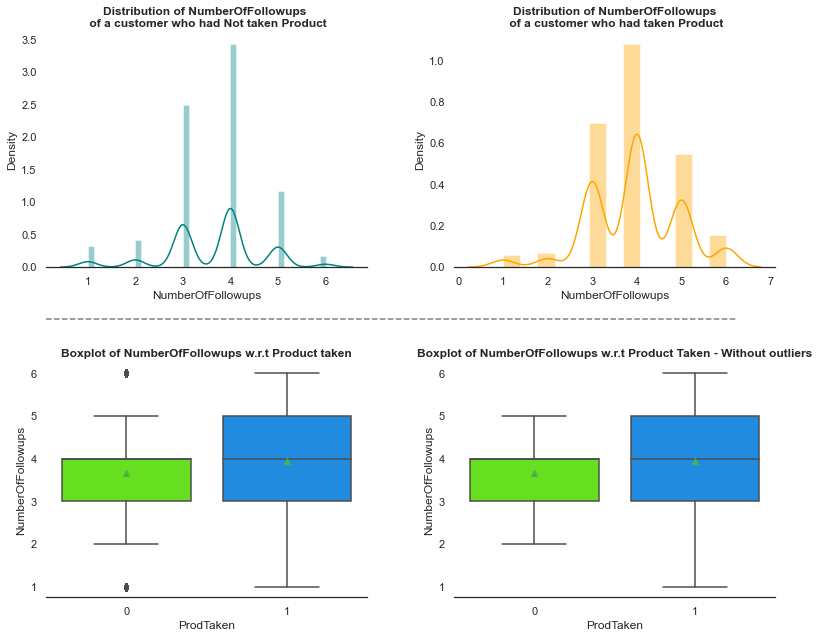

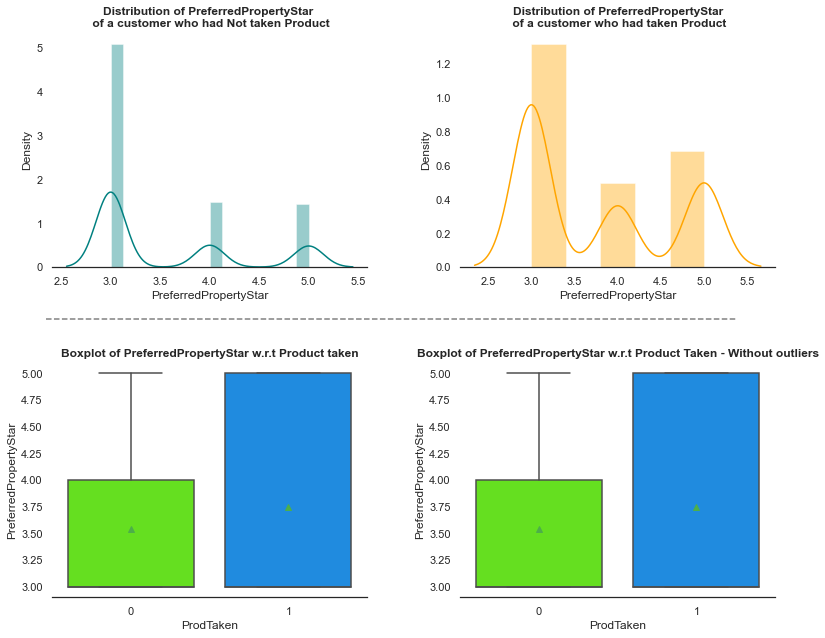

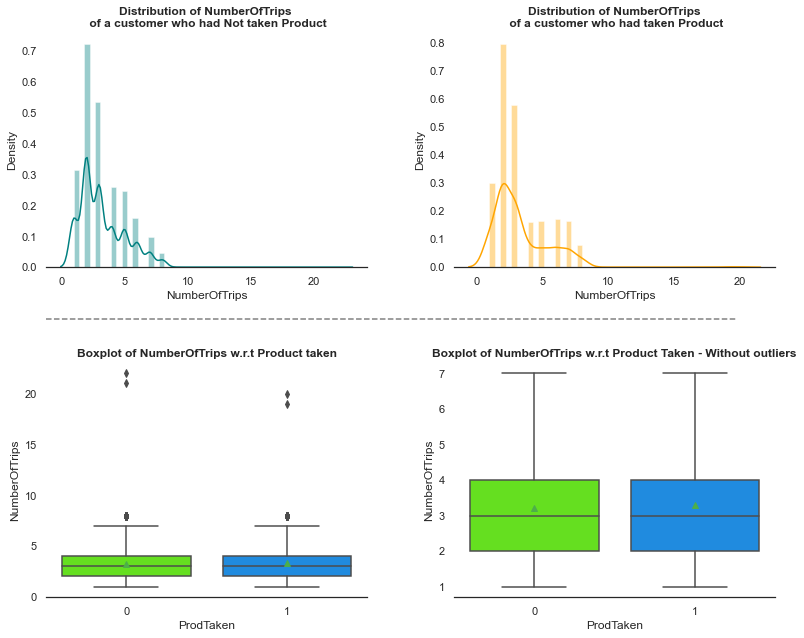

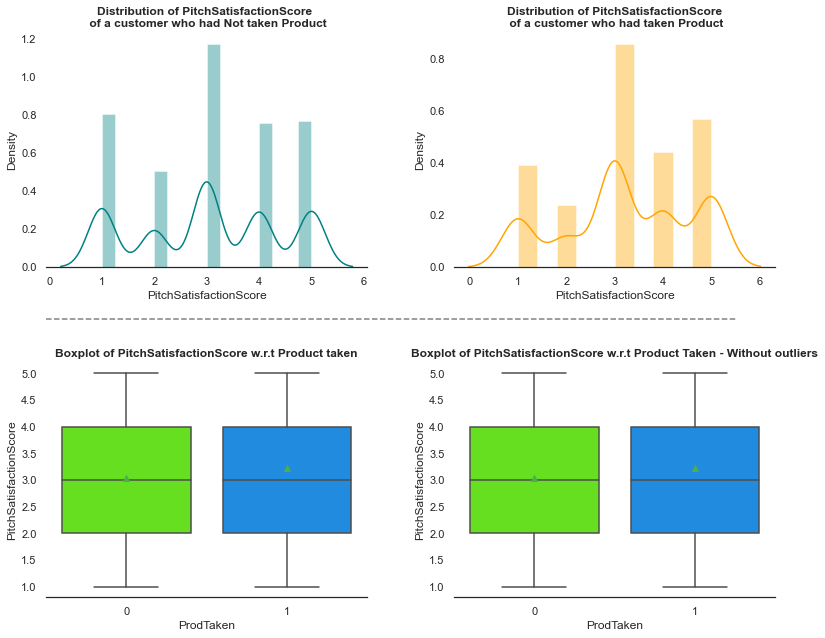

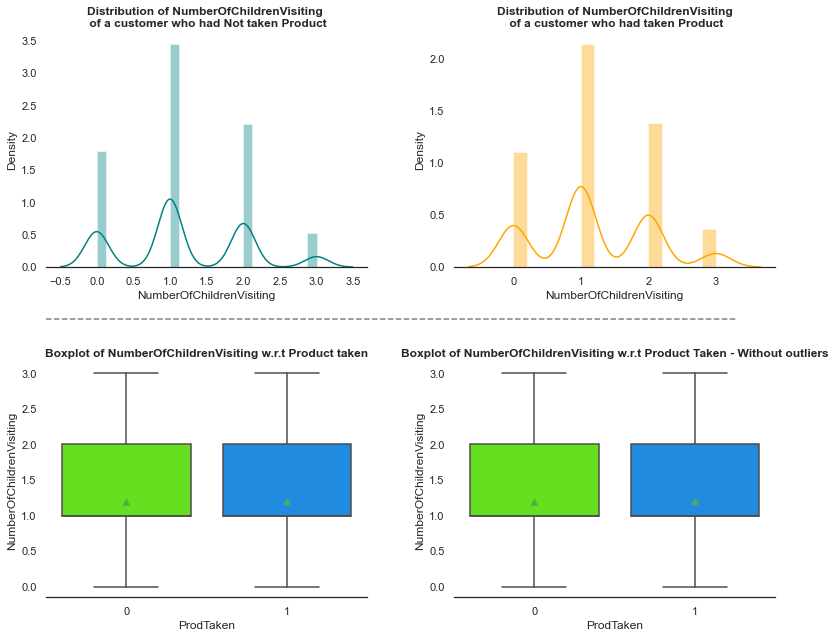

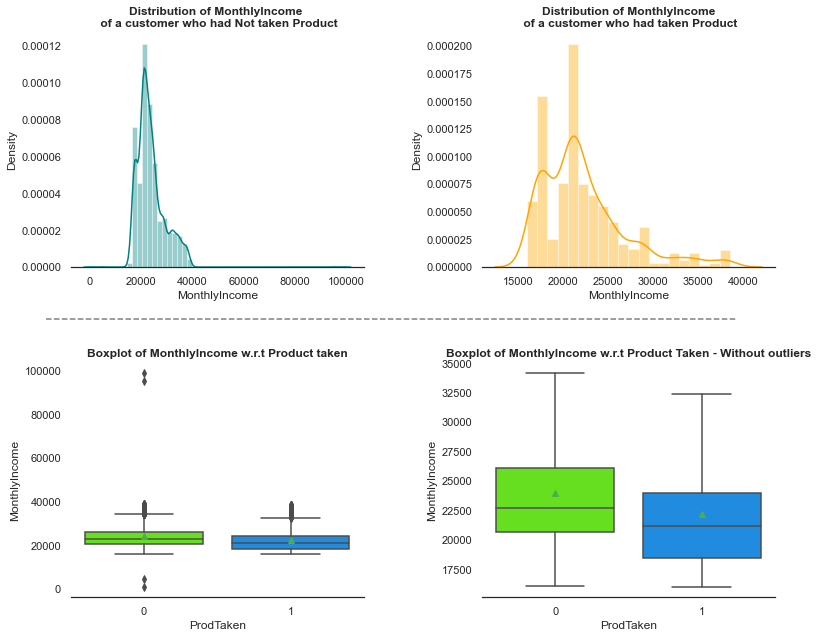

In [51]:
list_col=data.select_dtypes(include='number').columns.to_list()
for j in range(len(list_col)):
   plot(list_col[j])
   

### Inference:

- Customers who bought the product were predominantly between the ages of 28 and 35.
- Surprisingly, the duration of the pitch for customers that purchased the product was 10- 40 minutes. Customers who did not purchase the goods have some outliers in terms of pitch duration.
- There are several outliers in the number of journeys, such as 17 and 20.
- There are extreme outliers in monthly income. Customers that purchased the product earn an average of 18000-23000 dollars each month.


Text(0.5, 1.0, 'Monthly Income vs Occupation')

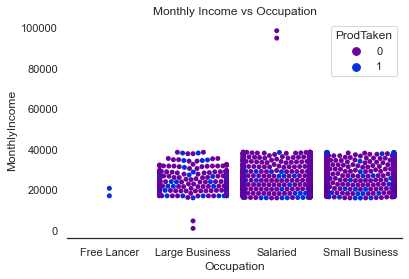

In [52]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))

sns.swarmplot(y='MonthlyIncome',x='Occupation',hue='ProdTaken',data=data)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('Monthly Income vs Occupation')

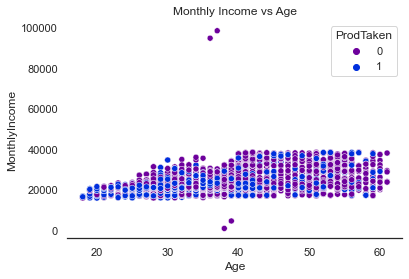

In [54]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))
sns.scatterplot(y='MonthlyIncome',x='Age',hue='ProdTaken',data=data);
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('Monthly Income vs Age');


********************************************************************************************************************************

### Missing value Detection and Treatment

In [55]:
print ("Missing values :\n\n", data.isnull().sum().sort_values(ascending=False))

Missing values :

 DurationOfPitch             251
Agebin                      240
Incomebin                   233
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
MaritalStatus                 0
Passport                      0
ProductPitched                0
PitchSatisfactionScore        0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
OwnCar                        0
CityTier                      0
Designation                   0
ProdTaken                     0
dtype: int64


*Missing value Treatment* **Type of contact** 

In [32]:
data['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [56]:
#Since we have most of the values in Self Enquiry, we can fill up the missing values with the mode
data['TypeofContact'].mode()

data['TypeofContact']=data['TypeofContact'].fillna('Self Enquiry')

In [57]:
data["TypeofContact"].isnull().sum()

0

*Missing value Treatment* **number of followup**  

In [59]:
# filling up number of followup with median

data['NumberOfFollowups']=data.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].apply(lambda x:x.fillna(x.median()))

In [66]:
data["NumberOfFollowups"].isnull().sum()

0

*Missing value Treatment* **PreferredPropertyStar**  

In [83]:
# we can fill in preferred propert star in terms with the designation and income
data['PreferredPropertyStar']=data.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))
data['PreferredPropertyStar']=data.groupby(["MonthlyIncome"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))
data['PreferredPropertyStar']=data.groupby(["Age"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))
data['PreferredPropertyStar']=data.groupby(["DurationOfPitch"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))
data['PreferredPropertyStar']=data.groupby(["NumberOfTrips"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))
data['PreferredPropertyStar']=data.groupby(["NumberOfFollowups"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))

In [84]:
data["PreferredPropertyStar"].isnull().sum()

0

*Missing value Treatment* **Duration of pitch**   

Let see how can we impute Duration of pitch.In my opinion an important factor for how long sale person take times to market his sales pitch depends on Product which sale person is proposing , number of followup will also decide duration of pitch. Let verify this.

In [85]:
data.groupby(['ProductPitched','NumberOfFollowups'], as_index=False)["DurationOfPitch"].median()

,ProductPitched,NumberOfFollowups,DurationOfPitch
0,Basic,1.00000,14.00000
1,Basic,2.00000,15.00000
2,Basic,3.00000,13.00000
3,Basic,4.00000,13.00000
4,Basic,5.00000,12.00000
5,Basic,6.00000,15.50000
6,Deluxe,1.00000,11.50000
7,Deluxe,2.00000,13.00000
8,Deluxe,3.00000,14.00000
9,Deluxe,4.00000,14.00000


In [86]:
# Filling missing Duration of pitch with median value
data["DurationOfPitch"] = data.groupby(["ProductPitched",'NumberOfFollowups'])["DurationOfPitch"].apply(
    lambda x: x.fillna(x.median()))

In [88]:
data["DurationOfPitch"].isnull().sum()

0

*Missing value Treatment* **NumberOfTrips**    

In [90]:
#Number of Trips could be similar with married or single people
data.groupby(['MaritalStatus'])["NumberOfTrips"].median()

MaritalStatus
Divorced    3.00000
Married     3.00000
Single      2.00000
Unmarried   3.00000
Name: NumberOfTrips, dtype: float64

In [92]:
# Filling in missing NumberOfTrips of pitch with median value
data["NumberOfTrips"] = data.groupby(["MaritalStatus"])["NumberOfTrips"].apply(
    lambda x: x.fillna(x.median()))

In [93]:
data["NumberOfTrips"].isnull().sum()

0

*Missing value Treatment* **NumberOfChildrenVisiting**     

In [95]:
# We can assume the number of children visiting could be because there is no children and hence we could fill it up with '0'
data['NumberOfChildrenVisiting']=data['NumberOfChildrenVisiting'].fillna(0)

In [96]:
data["NumberOfChildrenVisiting"].isnull().sum()

0

*Missing value Treatment* **Age**      

In [98]:
# We can try to fill up the age column with medians with respect to designation, gender and marital status
data.groupby(["Designation", "Gender","MaritalStatus"])["Age"].median()

# Impute missing Age with median value
data["Age"] = data.groupby(["Designation", "Gender","MaritalStatus"])["Age"].apply(
    lambda x: x.fillna(x.median())
)

In [99]:
data["Age"].isnull().sum()

0

*Missing value Treatment* **MonthlyIncome**       

In [105]:
# We can try to fill up the Monthly Income column with medians with respect to designation, gender and occupation
data.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].median()

Occupation      Designation     Gender
Free Lancer     AVP             Female           nan
                                Male             nan
                Executive       Female           nan
                                Male     18929.00000
                Manager         Female           nan
                                Male             nan
                Senior Manager  Female           nan
                                Male             nan
                VP              Female           nan
                                Male             nan
Large Business  AVP             Female   31872.00000
                                Male     29959.00000
                Executive       Female   20748.00000
                                Male     20743.50000
                Manager         Female   22198.50000
                                Male     21997.00000
                Senior Manager  Female   28266.00000
                                Male     26838.50000
       

In [106]:
data["MonthlyIncome"]=data.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].apply(
    lambda x: x.fillna(x.median())
)

In [107]:
data["MonthlyIncome"].isnull().sum()

0

In [108]:
#Checking for all missing values again!!
data.isnull().sum() 

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
Agebin                      240
Incomebin                   233
dtype: int64

We have finally been able to cover up the missing values in the main data. There is still some categories that needs filling, i.e, Agebin and Incomebin
********************************************************************************************************************************

Since our aim is to check the variables/features that affect the business we can look into **Age** and **Income** which we understand from the data given. 


In [110]:
data.Age.describe()

count   4888.00000
mean      37.41356
std        9.16280
min       18.00000
25%       31.00000
50%       36.00000
75%       43.00000
max       61.00000
Name: Age, dtype: float64

In [111]:
data['Agebin'] = pd.cut(data['Age'], bins = [15,25, 31, 40, 50, 70], labels = ['15-25','26-30', '31-40', '41-50', '51-70'])

In [112]:
data.Agebin.value_counts()

31-40    1894
41-50    1073
26-30    1025
51-70     549
15-25     347
Name: Agebin, dtype: int64

In [113]:
data.MonthlyIncome.describe()

count    4888.00000
mean    23543.85577
std      5267.65145
min      1000.00000
25%     20438.25000
50%     22393.00000
75%     25424.75000
max     98678.00000
Name: MonthlyIncome, dtype: float64

In [114]:
data['Incomebin'] = pd.cut(data['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

In [116]:
data.Incomebin.value_counts()

<25000     2490
<20000     1038
<30000      768
<35000      382
<40000      206
<100000       2
<15000        2
<50000        0
<45000        0
Name: Incomebin, dtype: int64

In [117]:
data.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
Agebin                      0
Incomebin                   0
dtype: int64

By this we have filled all missing values in all columns. Now we can start analysing
********************************************************************************************************************************

## Customer Profile by Product Type

In [118]:
# grouping customers who bought the product
cust_prof=data[data['ProdTaken']==1]

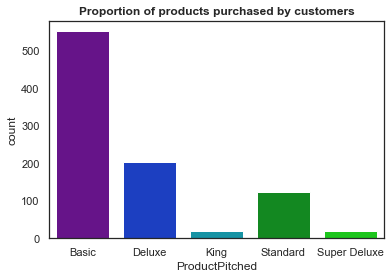

In [130]:
# grouping with respect to the product purchased
sns.countplot(x="ProductPitched", data=cust_prof).set_title('Proportion of products purchased by customers',fontweight="bold");

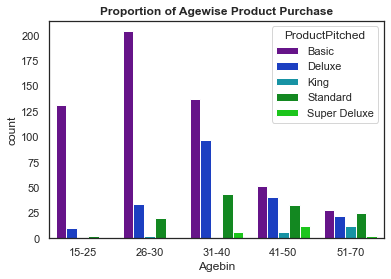

In [133]:
#Agewise grouping of purchase of products
sns.countplot(x='Agebin',hue='ProductPitched',data=cust_prof).set_title('Proportion of Agewise Product Purchase', fontweight="bold");

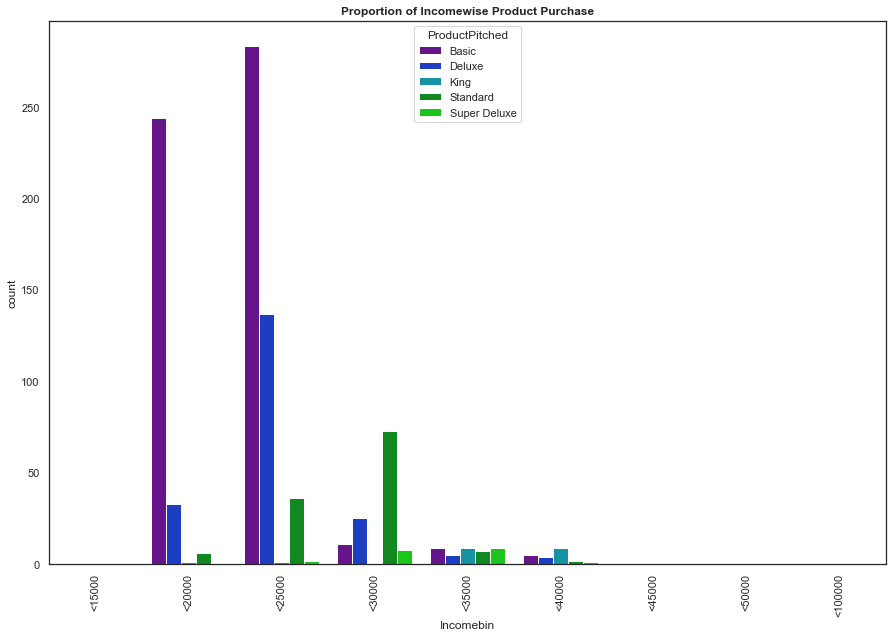

In [139]:
#Incomewise grouping of purchase of products
plt.figure(figsize=(15,10))
sns.countplot(x='Incomebin',hue='ProductPitched',data=cust_prof).set_title('Proportion of Incomewise Product Purchase', fontweight="bold");
plt.xticks(rotation=90);

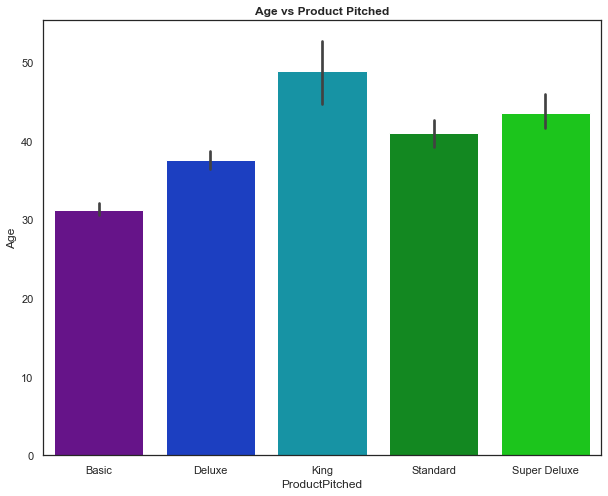

In [153]:
#Understanding category of product purchase in age group
plt.figure(figsize=(10,8))
sns.barplot(y='Age',x='ProductPitched',data=cust_prof).set_title('Age vs Product Pitched',fontweight="bold");

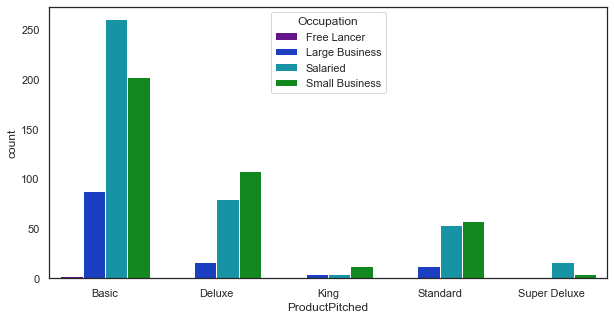

In [147]:
#Understanding category of product purchase with respect to Occupation
plt.figure(figsize=(10,5))
sns.countplot(x="ProductPitched", data=cust_prof,  hue="Occupation");

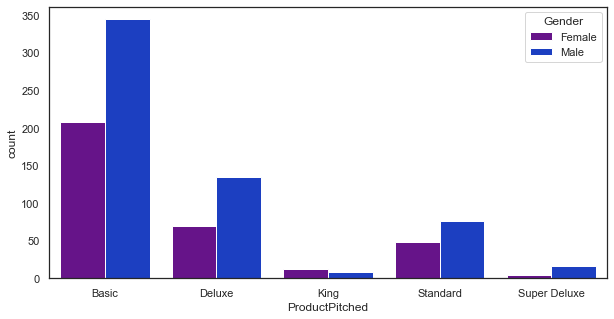

In [149]:
#Understanding category of product purchase with respect to Gender
plt.figure(figsize=(10,5))
sns.countplot(x="ProductPitched", data=cust_prof,  hue="Gender");

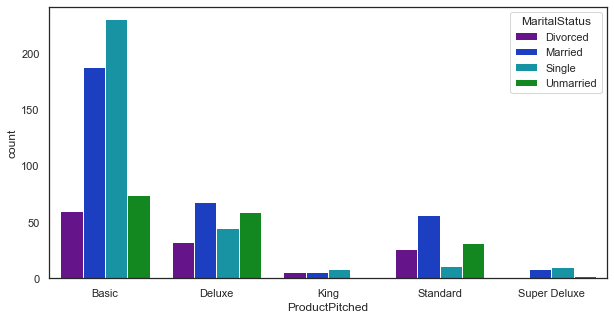

In [151]:
#Understanding category of product purchase with respect to Marital Status
plt.figure(figsize=(10,5))
sns.countplot(x="ProductPitched", data=cust_prof,  hue="MaritalStatus");

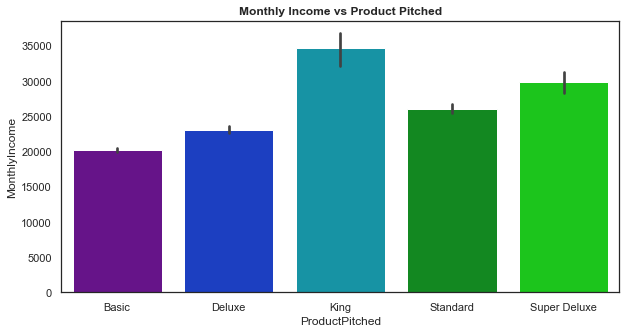

In [155]:
plt.figure(figsize=(10,5))
sns.barplot(y='MonthlyIncome',x='ProductPitched',data=cust_prof).set_title('Monthly Income vs Product Pitched',fontweight="bold");

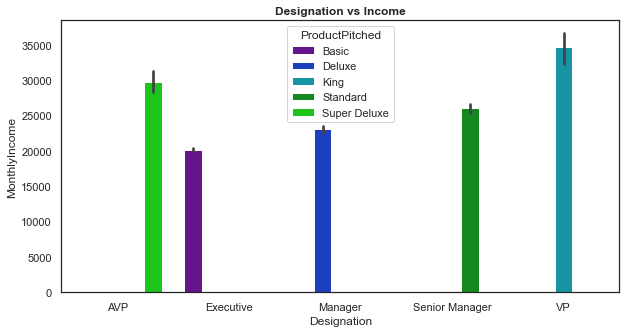

In [158]:
plt.figure(figsize=(10,5))
sns.barplot(x='Designation',y='MonthlyIncome',data=cust_prof,hue='ProductPitched').set_title('Designation vs Income',fontweight="bold");

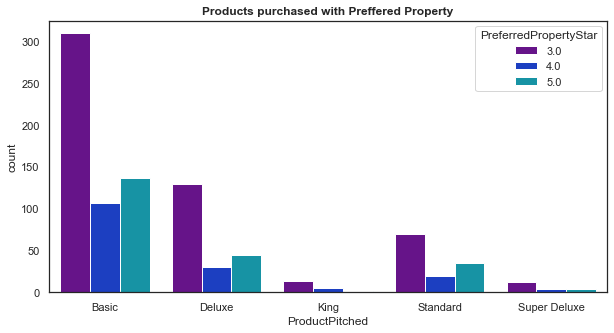

In [159]:
plt.figure(figsize=(10,5))
sns.countplot(x="ProductPitched", data=cust_prof,  hue="PreferredPropertyStar").set_title('Products purchased with Preffered Property',fontweight="bold");


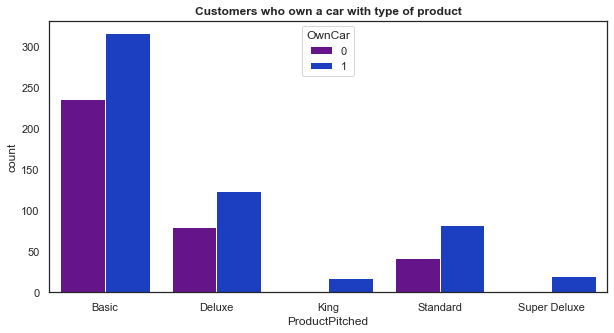

In [160]:
plt.figure(figsize=(10,5))
sns.countplot(x="ProductPitched", data=cust_prof,  hue="OwnCar").set_title('Customers who own a car with type of product',fontweight="bold");


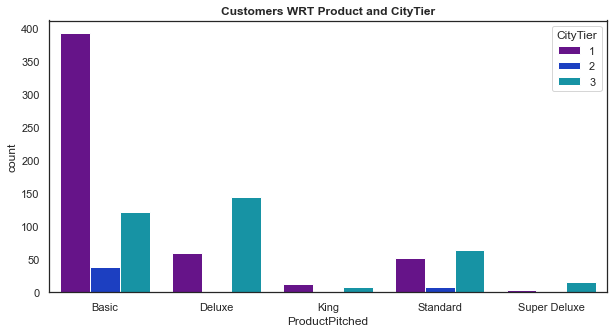

In [161]:
plt.figure(figsize=(10,5))
sns.countplot(x="ProductPitched", data=cust_prof,  hue="CityTier").set_title('Customers WRT Product and CityTier',fontweight="bold");


In [165]:
cust_prof.groupby(['ProductPitched']).agg({'MonthlyIncome':{'max','min','mean'},'Age':{'max','min','mean'}})

MonthlyIncome                              Age           \
                        mean         max         min     mean      max   
ProductPitched                                                           
Basic            20179.10870 37868.00000 16009.00000 31.26449 59.00000   
Deluxe           23093.33333 38525.00000 17086.00000 37.59069 59.00000   
King             34672.10000 38537.00000 17517.00000 48.90000 59.00000   
Standard         26035.41935 38395.00000 17372.00000 40.99194 60.00000   
Super Deluxe     29823.80000 37502.00000 21151.00000 43.50000 56.00000   

                         
                    min  
ProductPitched           
Basic          18.00000  
Deluxe         21.00000  
King           27.00000  
Standard       19.00000  
Super Deluxe   39.00000

In [167]:
cust_prof[cust_prof['ProductPitched']=='Basic'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,552.00000,1.00000,1.00000,552.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,552.00000,NaN,NaN,NaN,31.26449,8.76590,18.00000,26.00000,30.00000,34.00000,59.00000
TypeofContact,552,2,Self Enquiry,358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,552.00000,3.00000,1.00000,392.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,552.00000,NaN,NaN,NaN,15.69293,7.78024,6.00000,9.00000,14.00000,21.00000,36.00000
Occupation,552,4,Salaried,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,552,2,Male,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,552.00000,NaN,NaN,NaN,2.90580,0.70144,2.00000,2.00000,3.00000,3.00000,4.00000
NumberOfFollowups,552.00000,NaN,NaN,NaN,3.95109,0.96366,1.00000,3.00000,4.00000,5.00000,6.00000
ProductPitched,552,1,Basic,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
cust_prof[cust_prof['ProductPitched']=='Deluxe'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,204.00000,1.00000,1.00000,204.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,204.00000,NaN,NaN,NaN,37.59069,8.35041,21.00000,32.00000,35.75000,43.25000,59.00000
TypeofContact,204,2,Self Enquiry,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,204.00000,2.00000,3.00000,144.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,204.00000,NaN,NaN,NaN,18.46324,8.84165,6.00000,12.00000,15.00000,26.00000,36.00000
Occupation,204,3,Small Business,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,204,2,Male,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,204.00000,NaN,NaN,NaN,2.95098,0.70714,2.00000,2.00000,3.00000,3.00000,4.00000
NumberOfFollowups,204.00000,NaN,NaN,NaN,3.97059,1.04061,1.00000,3.00000,4.00000,5.00000,6.00000
ProductPitched,204,1,Deluxe,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
cust_prof[cust_prof['ProductPitched']=='King'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20.00000,1.00000,1.00000,20.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,20.00000,NaN,NaN,NaN,48.90000,9.61851,27.00000,42.00000,52.50000,56.00000,59.00000
TypeofContact,20,1,Self Enquiry,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.00000,2.00000,1.00000,12.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.00000,NaN,NaN,NaN,10.50000,4.13585,8.00000,8.00000,9.00000,9.00000,19.00000
Occupation,20,3,Small Business,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Female,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.00000,NaN,NaN,NaN,2.90000,0.71818,2.00000,2.00000,3.00000,3.00000,4.00000
NumberOfFollowups,20.00000,NaN,NaN,NaN,4.30000,1.12858,3.00000,3.00000,4.00000,5.00000,6.00000
ProductPitched,20,1,King,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
cust_prof[cust_prof['ProductPitched']=='Standard'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,124.00000,1.00000,1.00000,124.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,124.00000,NaN,NaN,NaN,40.99194,9.83812,19.00000,33.00000,38.00000,49.00000,60.00000
TypeofContact,124,2,Self Enquiry,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,124.00000,3.00000,3.00000,64.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,124.00000,NaN,NaN,NaN,19.02419,9.02342,6.00000,11.00000,17.00000,29.00000,36.00000
Occupation,124,3,Small Business,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,124,2,Male,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,124.00000,NaN,NaN,NaN,2.96774,0.70924,2.00000,2.00000,3.00000,3.00000,4.00000
NumberOfFollowups,124.00000,NaN,NaN,NaN,3.93548,0.90833,1.00000,3.00000,4.00000,4.25000,6.00000
ProductPitched,124,1,Standard,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
cust_prof[cust_prof['ProductPitched']=='Super Deluxe'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20.00000,1.00000,1.00000,20.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,20.00000,NaN,NaN,NaN,43.50000,4.83953,39.00000,40.00000,42.00000,45.25000,56.00000
TypeofContact,20,2,Company Invited,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.00000,2.00000,3.00000,16.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.00000,NaN,NaN,NaN,18.50000,7.33054,8.00000,15.00000,18.50000,20.00000,31.00000
Occupation,20,2,Salaried,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Male,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.00000,NaN,NaN,NaN,2.70000,0.65695,2.00000,2.00000,3.00000,3.00000,4.00000
NumberOfFollowups,20.00000,NaN,NaN,NaN,3.10000,1.61897,1.00000,2.00000,3.00000,4.00000,6.00000
ProductPitched,20,1,Super Deluxe,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Inferences:
* Customers who were offered a basic package were more likely to bring it, followed by standard. It could be because it is less expensive.
* The product was mostly purchased by executives and senior managers.
* The goods was mostly purchased by customers visiting with 2,3,4 travellers.
* Customers who were invited were largely from city tier 2,3 and had purchased packages and chose 5 star rated properties.
* Customers between the ages of 18 and 25 were the most to acquire the product, followed by those between the ages of 26 and 30.
* Customers with incomes ranging from 15000 to 20000 dollars purchased the product most, followed by customers with incomes ranging from 20000 to 25000 dollars.
* People who are single or unmarried have a better probability of acquiring a travel package.
* Having a passport boosted the package's chances of being purchased.
* Customers who took 7 or 8 trips were more likely to purchase the packages.
* Customers were more likely to purchase a travel package when the marketing team conducted a large number of follow-ups, a longer pitch, and promoted a basic product.

From the data we can infer the below details regarding each product category: <br>
**Basic package :** Most of the customer have Monthly income < 25000, Age is in range of  26-30, Designation as Executive belong to City tier 1, are salaried and single males . Customer contacted the company.Married customers also prefer this basic package.

**Deluxe package:** Most of the customer have Monthly income < 25000, Age is in range of 31-40, Designation as Managers belong to city tier 3 and occupation is small business and married .Customer contacted the company. City tier 1 and divorced customers also preferred this package


**King :** Most of the customer have  Monthly income  in range of  30000-35000, age range in 51-60,  Designation as VP. Belong to city tier 1 and are single female  and  Occupation is small business.Females buy this package more than men.

**SuperDeluxe:** Most of the customer have  Monthly income < 35000, Age is in range 41-50, Designation as AVP,  belongs to tier city 3 and is Single, male and occupation is salaried. Majority of them  were company invited

**Standard package:** Most of the customer have Monthly income  <30000,Age is in range of 31-40 , Designation as Senior Manager, is married , from tier city 3,and occupation is small business. majority of them had self inquired.
*******************************************************************************************************************************

### Outlier Detection

In [180]:
Q1 = data.quantile(0.25)             
Q3 = data.quantile(0.75)
IQR = Q3 - Q1                          
lower=Q1-1.5*IQR                        
upper=Q3+1.5*IQR

In [181]:
((data.select_dtypes(include=['float64','int64'])<lower) | (data.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

Age                        0.00000
DurationOfPitch            2.29133
NumberOfPersonVisiting     0.06137
NumberOfFollowups          6.38298
PreferredPropertyStar      0.00000
NumberOfTrips              2.22995
PitchSatisfactionScore     0.00000
NumberOfChildrenVisiting   0.00000
MonthlyIncome              7.52864
dtype: float64

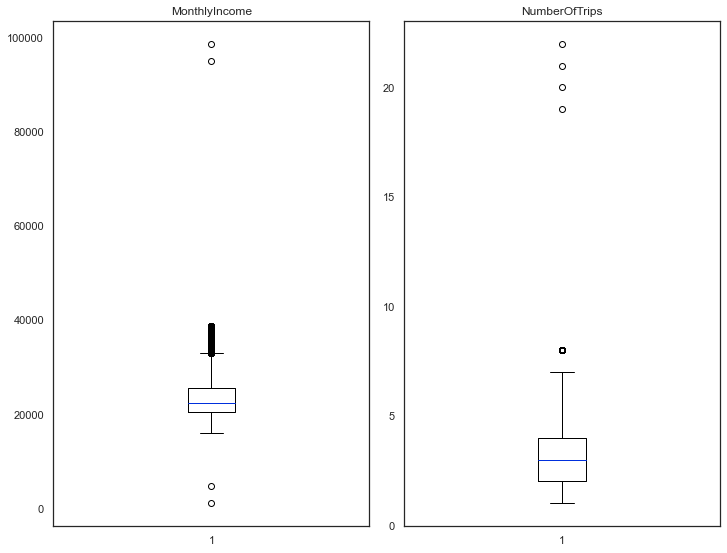

In [182]:
numeric_columns = ['MonthlyIncome','NumberOfTrips']
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [185]:
data.sort_values(by=["MonthlyIncome"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
2482,0,37.00000,Self Enquiry,1,12.00000,Salaried,Female,3,5.00000,Basic,...,Divorced,2.00000,1,2,1,1.00000,Executive,98678.00000,31-40,<100000
38,0,36.00000,Self Enquiry,1,11.00000,Salaried,Female,2,4.00000,Basic,...,Divorced,1.00000,1,2,1,0.00000,Executive,95000.00000,31-40,<100000
2634,0,53.00000,Self Enquiry,1,7.00000,Salaried,Male,4,5.00000,King,...,Divorced,2.00000,0,2,1,2.00000,VP,38677.00000,51-70,<40000
4104,0,53.00000,Self Enquiry,1,7.00000,Salaried,Male,4,5.00000,King,...,Married,2.00000,0,1,1,3.00000,VP,38677.00000,51-70,<40000
3190,0,42.00000,Company Invited,1,14.00000,Salaried,Female,3,6.00000,King,...,Married,3.00000,0,4,1,1.00000,VP,38651.00000,41-50,<40000


We can see that there are 2 values which are extremely high in Monthly Income

In [186]:
data.sort_values(by=["NumberOfTrips"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
3260,0,40.00000,Company Invited,1,16.00000,Salaried,Male,4,4.00000,Deluxe,...,Unmarried,22.00000,0,2,1,1.00000,Manager,25460.00000,31-40,<30000
816,0,39.00000,Company Invited,1,15.00000,Salaried,Male,3,3.00000,Deluxe,...,Unmarried,21.00000,0,2,1,0.00000,Manager,21782.00000,31-40,<25000
2829,1,31.00000,Company Invited,1,11.00000,Large Business,Male,3,4.00000,Basic,...,Single,20.00000,1,4,1,2.00000,Executive,20963.00000,26-30,<25000
385,1,30.00000,Company Invited,1,10.00000,Large Business,Male,2,3.00000,Basic,...,Single,19.00000,1,4,1,1.00000,Executive,17285.00000,26-30,<20000
3155,1,30.00000,Self Enquiry,1,17.00000,Salaried,Female,4,5.00000,Basic,...,Single,8.00000,1,5,1,2.00000,Executive,21082.00000,26-30,<25000


 We can see that there are just four observations with number of trips 19 or greater

In [187]:
data[(data.MonthlyIncome>40000) | (data.MonthlyIncome<12000)]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
38,0,36.00000,Self Enquiry,1,11.00000,Salaried,Female,2,4.00000,Basic,...,Divorced,1.00000,1,2,1,0.00000,Executive,95000.00000,31-40,<100000
142,0,38.00000,Self Enquiry,1,9.00000,Large Business,Female,2,3.00000,Deluxe,...,Single,4.00000,1,5,0,0.00000,Manager,1000.00000,31-40,<15000
2482,0,37.00000,Self Enquiry,1,12.00000,Salaried,Female,3,5.00000,Basic,...,Divorced,2.00000,1,2,1,1.00000,Executive,98678.00000,31-40,<100000
2586,0,39.00000,Self Enquiry,1,10.00000,Large Business,Female,3,4.00000,Deluxe,...,Single,5.00000,1,5,0,1.00000,Manager,4678.00000,31-40,<15000


*Removing these outliers form duration of pitch, monthly income, and number of trips.*

In [188]:
data.drop(index=data[data.DurationOfPitch>37].index,inplace=True)

data.drop(index=data[(data.MonthlyIncome>40000) | (data.MonthlyIncome<12000)].index,inplace=True)

data.drop(index=data[data.NumberOfTrips>10].index,inplace=True)

********************************************************************************************************************************

### Split the dataset

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4878 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4878 non-null   category
 1   Age                       4878 non-null   float64 
 2   TypeofContact             4878 non-null   category
 3   CityTier                  4878 non-null   category
 4   DurationOfPitch           4878 non-null   float64 
 5   Occupation                4878 non-null   category
 6   Gender                    4878 non-null   category
 7   NumberOfPersonVisiting    4878 non-null   int64   
 8   NumberOfFollowups         4878 non-null   float64 
 9   ProductPitched            4878 non-null   category
 10  PreferredPropertyStar     4878 non-null   float64 
 11  MaritalStatus             4878 non-null   category
 12  NumberOfTrips             4878 non-null   float64 
 13  Passport                  4878 non-null   catego

Based on the information given, customer interaction data will be unavailable for new and prospective customers, hence deleting columns relating to customer contact will be necessary.

In [189]:
X = data.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch','Agebin','Incomebin'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['ProdTaken']

In [190]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape

((3414, 22), (1464, 22))

In [196]:
def make_confusion_matrix(y_actual,y_predict,title):
    '''Plot confusion matrix'''
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',ax=ax)
    
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [197]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,flag=True):
    
    # defining an empty list to store train and test results
    score_list=[] 
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    if flag == True: 
          metric_names = ['Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall','Train_Precision',
                          'Test_Precision', 'Train_F1-Score', 'Test_F1-Score']
          cols = ['Metric', 'Score']
          records = [(name, score) for name, score in zip(metric_names, score_list)]
          display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)
          make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
          make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
    return score_list # returning the list with train and test scores

In [198]:
# # defining empty lists to add train and test results 
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

********************************************************************************************************************************

## Model Building

#### Decision Tree

In [199]:
dtree=DecisionTreeClassifier(random_state=1, class_weight={0:0.20, 1:0.80})
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.00000,0.85383,1.00000,0.60145,1.00000,0.61481,1.00000,0.60806


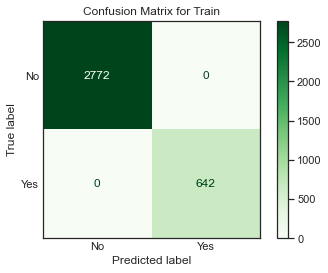

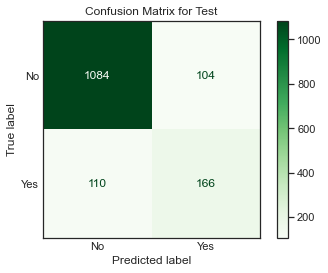

In [200]:
dtree_score=get_metrics_score(dtree,X_train,X_test,y_train,y_test)
add_score_model(dtree_score)

Decision tree is overfitting the training data as there is lot of disparity between test and train.Recall score is also not that high

#### Bagging classifier

In [93]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1, verbose=1)
bagging_classifier.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


BaggingClassifier(random_state=1, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.99033,0.88661,0.95327,0.51087,0.99512,0.81977,0.97375,0.62946


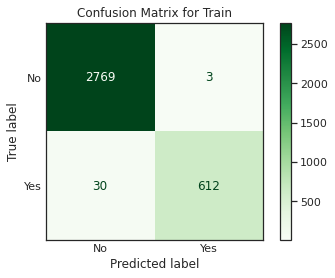

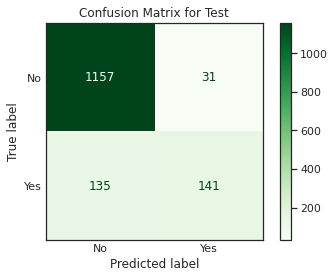

In [94]:
bagging_score=get_metrics_score(bagging_classifier,X_train,X_test,y_train,y_test)
add_score_model(bagging_score)

Bagging is  still overfitting the training data , Recall score has decreased for test data

#### Random Forest 

In [95]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.00000,0.88730,1.00000,0.48551,1.00000,0.85350,1.00000,0.61894


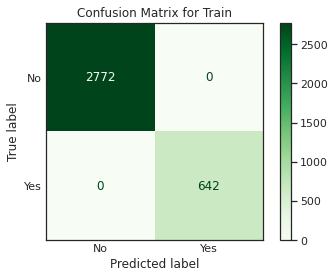

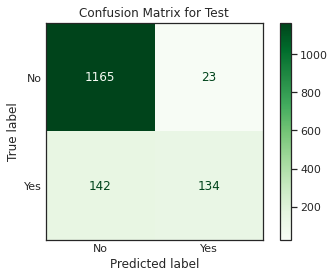

In [96]:
score_list_rf=get_metrics_score(rf_estimator,X_train,X_test,y_train,y_test)
add_score_model(score_list_rf)

Random forest  is overfitting the traning data

### Model Performance Evaluation

In [97]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Decision Tree,1.00000,0.85246,1.00000,0.58696,1.00000,0.61364,1.00000,0.60000
1,Bagging Classifier,0.99033,0.88661,0.95327,0.51087,0.99512,0.81977,0.97375,0.62946
2,Random Forest,1.00000,0.88730,1.00000,0.48551,1.00000,0.85350,1.00000,0.61894


#### Tuning Decision Tree

In [98]:
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1)

parameters = {'max_depth': [1,4,7,15], 
              'min_samples_leaf': [2,3,5],
              'max_leaf_nodes' : [ 5,7,10,15] }

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_tuned = grid_obj.best_estimator_

dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=7,
                       max_leaf_nodes=15, min_samples_leaf=2, random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.78559,0.76639,0.68069,0.66304,0.45332,0.42361,0.54421,0.51695


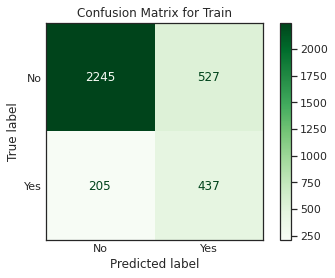

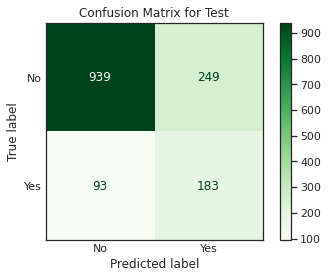

In [99]:
score_tune_dt=get_metrics_score(dtree_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_dt) # add score to dataframe

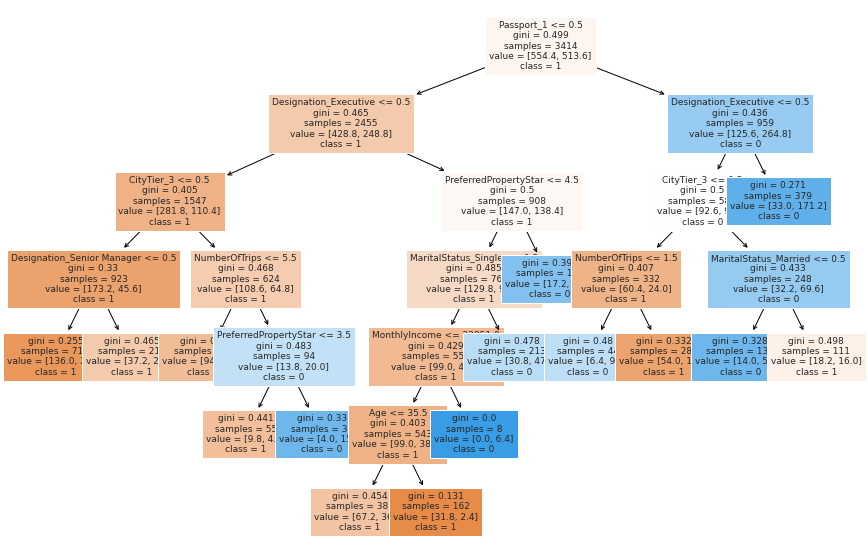

In [100]:
plt.figure(figsize=(15,10))
feature_names = X_train.columns
out = tree.plot_tree(dtree_tuned,feature_names=feature_names,filled=True,fontsize=9,class_names=['1','0'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [101]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Passport_1                 0.31385
Designation_Executive      0.23321
CityTier_3                 0.13094
PreferredPropertyStar      0.08738
MaritalStatus_Single       0.05706
NumberOfTrips              0.05188
MonthlyIncome              0.04156
MaritalStatus_Married      0.03142
Designation_Senior Manager 0.02659
Age                        0.02611
Designation_Manager        0.00000
OwnCar_1                   0.00000
MaritalStatus_Unmarried    0.00000
Occupation_Small Business  0.00000
Gender_Male                0.00000
NumberOfPersonVisiting     0.00000
Occupation_Salaried        0.00000
Occupation_Large Business  0.00000
CityTier_2                 0.00000
TypeofContact_Self Enquiry 0.00000
NumberOfChildrenVisiting   0.00000
Designation_VP             0.00000


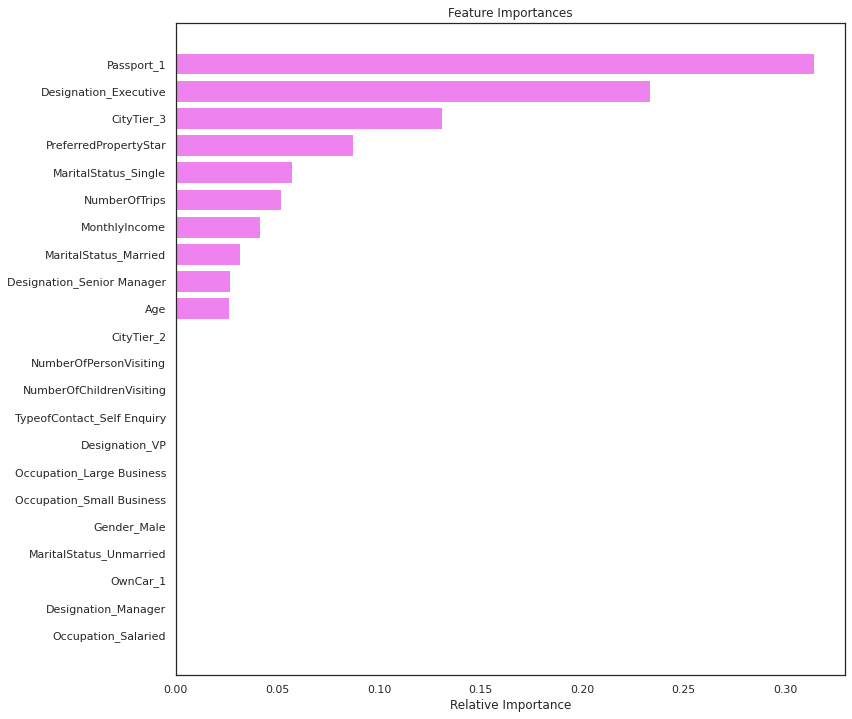

In [102]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From Tuned Decision Tree the most important features are having a passport , Desgination as Executive,City tier 3, preferred Property Star, Single marital status.

#### Tuning Random Forest

In [103]:
rf_tuned = RandomForestClassifier(class_weight={0:0.20,1:0.80},random_state=1)

parameters = { "max_depth":[5,9,15],
               "n_estimators": [150,200,250,500],
               "min_samples_leaf": np.arange(5, 10),
                "max_features": ['auto'],
                "max_samples": np.arange(0.3,0.5, 0.7)
              }
scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       max_samples=0.3, min_samples_leaf=9, n_estimators=500,
                       random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.82484,0.81216,0.63707,0.62319,0.52842,0.50146,0.57768,0.55574


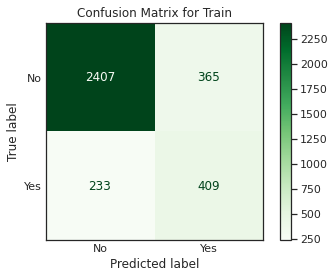

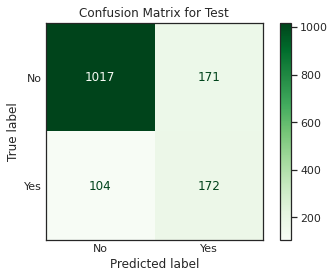

In [104]:
score_tune_rt=get_metrics_score(rf_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_rt) 

In [105]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Passport_1                 0.19115
MonthlyIncome              0.12971
Age                        0.12861
Designation_Executive      0.12658
MaritalStatus_Single       0.06428
CityTier_3                 0.05120
NumberOfTrips              0.04778
PreferredPropertyStar      0.04145
Designation_Manager        0.04131
MaritalStatus_Married      0.03720
NumberOfChildrenVisiting   0.01648
NumberOfPersonVisiting     0.01608
MaritalStatus_Unmarried    0.01472
Gender_Male                0.01430
TypeofContact_Self Enquiry 0.01405
Designation_Senior Manager 0.01300
Occupation_Small Business  0.01155
Occupation_Salaried        0.01133
OwnCar_1                   0.00947
Occupation_Large Business  0.00897
Designation_VP             0.00679
CityTier_2                 0.00400


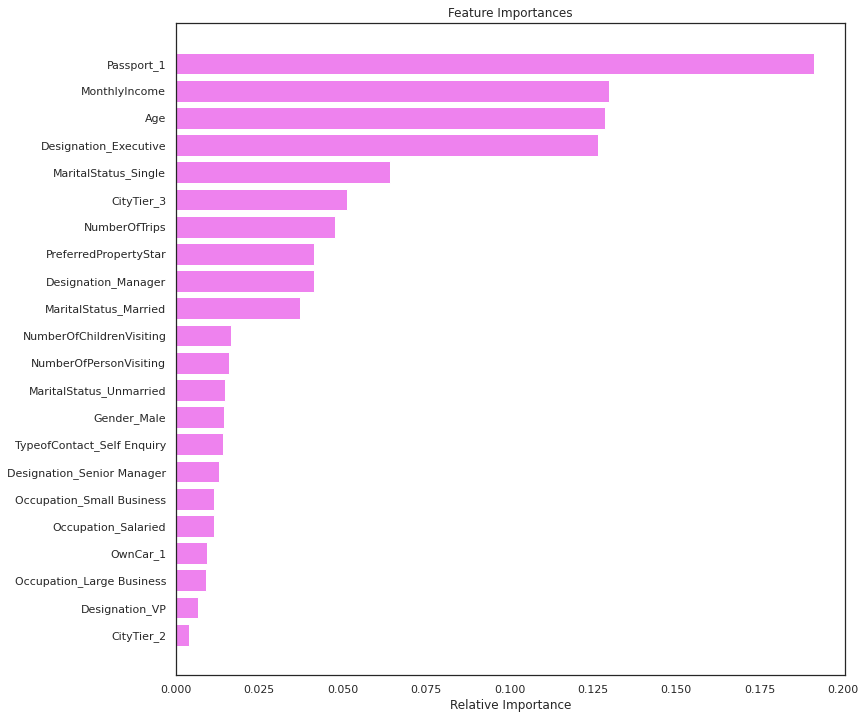

In [106]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From tuned random forest the most important features are having a passport,Monthly Income,Age, designation executive, single marital status, City Tier 3.

#### Tuning Bagging Classifier

In [107]:
bagging_estimator_tuned = BaggingClassifier(DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1),random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_tuned = grid_obj.best_estimator_

bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                      1: 0.8},
                                                        random_state=1),
                  max_features=0.9, max_samples=0.9, n_estimators=30,
                  random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.99824,0.87910,0.99065,0.46014,1.00000,0.81935,0.99531,0.58933


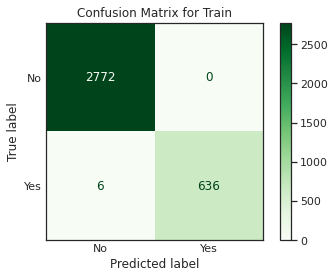

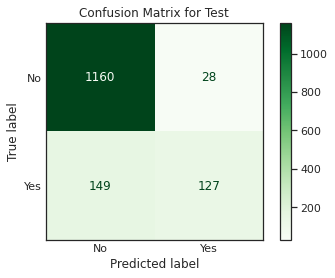

In [108]:
bagging_tuned=get_metrics_score(bagging_estimator_tuned,X_train,X_test,y_train,y_test)
add_score_model(bagging_tuned)

In [109]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
3,Tuned Decision Tree,0.78559,0.76639,0.68069,0.66304,0.45332,0.42361,0.54421,0.51695
4,Tuned Random Forest,0.82484,0.81216,0.63707,0.62319,0.52842,0.50146,0.57768,0.55574
0,Decision Tree,1.00000,0.85246,1.00000,0.58696,1.00000,0.61364,1.00000,0.60000
1,Bagging Classifier,0.99033,0.88661,0.95327,0.51087,0.99512,0.81977,0.97375,0.62946
2,Random Forest,1.00000,0.88730,1.00000,0.48551,1.00000,0.85350,1.00000,0.61894
5,Tuned Bagging Classifier,0.99824,0.87910,0.99065,0.46014,1.00000,0.81935,0.99531,0.58933


********************************************************************************************************************************
### Model Building Boosting 

#### Adaboost

In [110]:
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)


AdaBoostClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.84593,0.84563,0.30374,0.28623,0.71168,0.73148,0.42576,0.41146


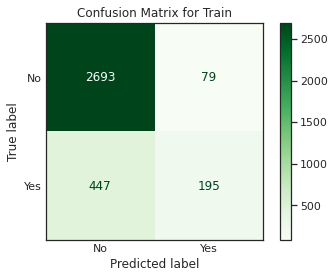

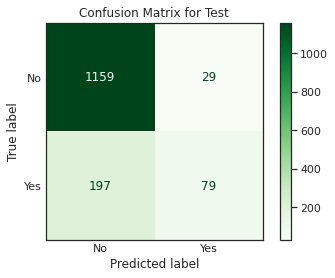

In [111]:
adaboost_score=get_metrics_score(adaboost,X_train,X_test,y_train,y_test)
add_score_model(adaboost_score)

#### Gradient Boost

In [112]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.87961,0.86134,0.45016,0.38406,0.83285,0.76259,0.58443,0.51084


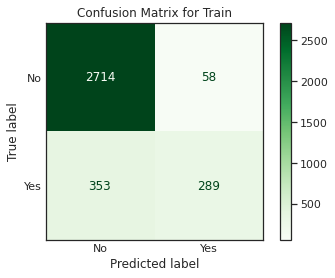

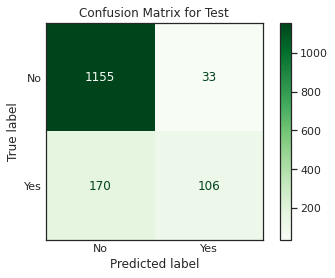

In [113]:
gbc_score=get_metrics_score(gbc,X_train,X_test,y_train,y_test)
add_score_model(gbc_score)

#### XGBoost 

In [114]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.99531,0.89003,0.97508,0.55797,1.00000,0.79793,0.98738,0.65672


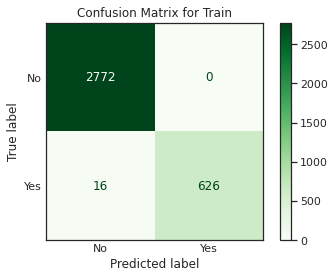

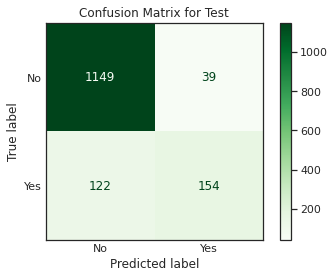

In [115]:
xgb_score=get_metrics_score(xgb,X_train,X_test,y_train,y_test)
add_score_model(xgb_score)

In [116]:
feature_names = X_train.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(xgb.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Designation_Executive      0.19272
Passport_1                 0.10137
CityTier_3                 0.06134
MaritalStatus_Unmarried    0.05306
MaritalStatus_Single       0.05169
TypeofContact_Self Enquiry 0.04979
Occupation_Large Business  0.04821
PreferredPropertyStar      0.04246
NumberOfTrips              0.03685
Designation_Senior Manager 0.03555
MaritalStatus_Married      0.03540
Age                        0.03488
Gender_Male                0.03235
CityTier_2                 0.03195
MonthlyIncome              0.02822
Occupation_Small Business  0.02735
NumberOfPersonVisiting     0.02626
Designation_Manager        0.02608
NumberOfChildrenVisiting   0.02314
Occupation_Salaried        0.02313
OwnCar_1                   0.02285
Designation_VP             0.01536


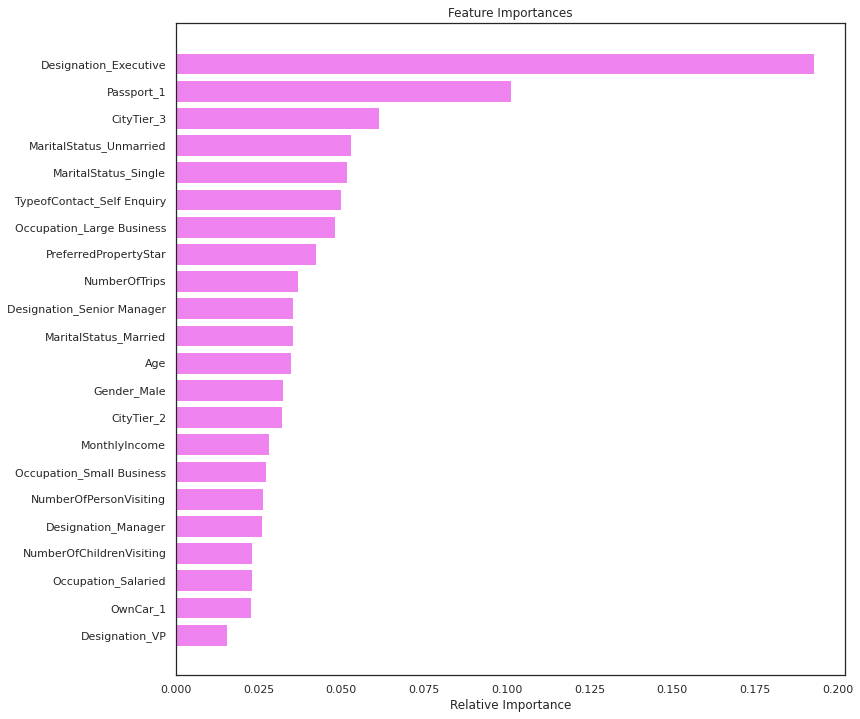

In [117]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From XGBoost the most important features are having a designation as executive, having a passport, from CityTier3, Unmarried and Single Marital Status

********************************************************************************************************************************
### Model Performance Evaluation after Boosting

In [118]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Random Forest',
                                          'Bagging Classifier',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier',
                                          'AdaBoost',
                                          'Gradient Boost',
                                          'XGboost',
                                          ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
3,Tuned Decision Tree,0.78559,0.76639,0.68069,0.66304,0.45332,0.42361,0.54421,0.51695
4,Tuned Random Forest,0.82484,0.81216,0.63707,0.62319,0.52842,0.50146,0.57768,0.55574
0,Decision Tree,1.00000,0.85246,1.00000,0.58696,1.00000,0.61364,1.00000,0.60000
8,XGboost,0.99531,0.89003,0.97508,0.55797,1.00000,0.79793,0.98738,0.65672
1,Random Forest,0.99033,0.88661,0.95327,0.51087,0.99512,0.81977,0.97375,0.62946
2,Bagging Classifier,1.00000,0.88730,1.00000,0.48551,1.00000,0.85350,1.00000,0.61894
5,Tuned Bagging Classifier,0.99824,0.87910,0.99065,0.46014,1.00000,0.81935,0.99531,0.58933
7,Gradient Boost,0.87961,0.86134,0.45016,0.38406,0.83285,0.76259,0.58443,0.51084
6,AdaBoost,0.84593,0.84563,0.30374,0.28623,0.71168,0.73148,0.42576,0.41146


#### Tuned AdaBoost Classifier

In [119]:
abc_tuned = AdaBoostClassifier(random_state=1)

parameters = {
        "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2)],
    "n_estimators": np.arange(10,50,100),
    "learning_rate":np.arange(0.1,1,0.1)
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

abc_tuned = grid_obj.best_estimator_

abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.9, n_estimators=10, random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.84827,0.84085,0.34112,0.31884,0.69745,0.66165,0.45816,0.43032


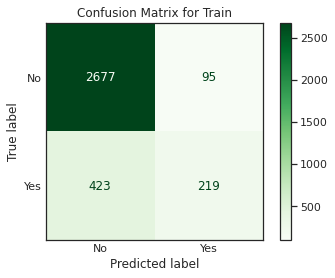

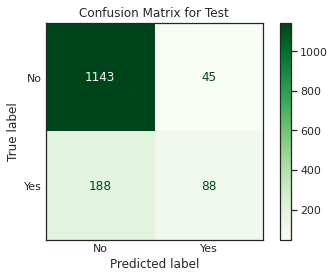

In [120]:
abc_tuned_score=get_metrics_score(abc_tuned,X_train,X_test,y_train,y_test)
add_score_model(abc_tuned_score)

In [121]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(abc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Age                        0.18765
NumberOfTrips              0.11939
MonthlyIncome              0.08500
Designation_Executive      0.08263
Passport_1                 0.07928
Designation_Senior Manager 0.07538
CityTier_3                 0.07196
MaritalStatus_Single       0.05326
PreferredPropertyStar      0.04754
Occupation_Salaried        0.03610
MaritalStatus_Unmarried    0.03589
TypeofContact_Self Enquiry 0.03406
NumberOfPersonVisiting     0.03153
Gender_Male                0.03048
Occupation_Small Business  0.02984
MaritalStatus_Married      0.00000
Occupation_Large Business  0.00000
OwnCar_1                   0.00000
CityTier_2                 0.00000
Designation_Manager        0.00000
NumberOfChildrenVisiting   0.00000
Designation_VP             0.00000


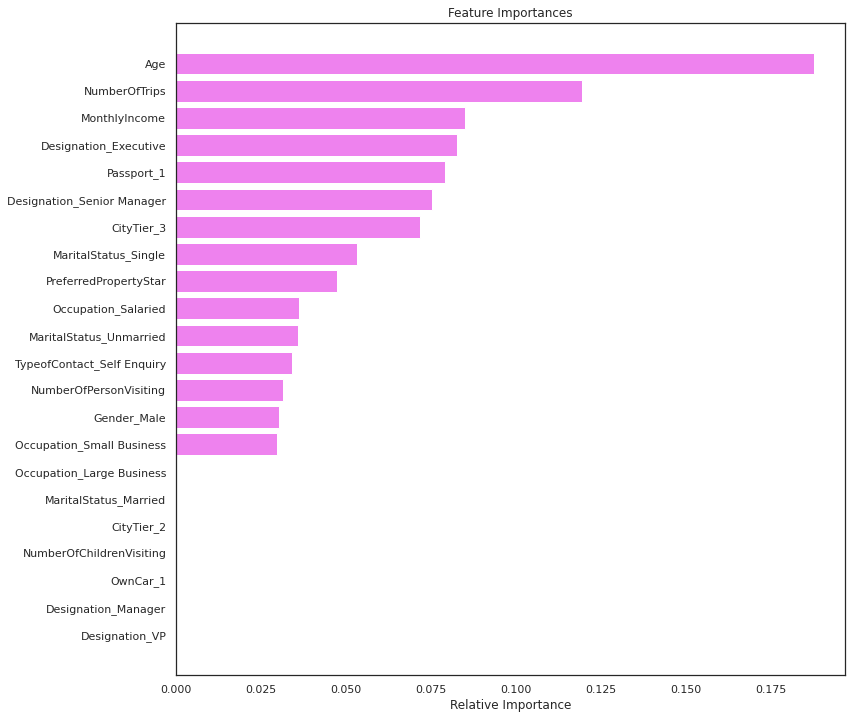

In [122]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From tuned AdaBoost the most important features are Age, number of trips, monthly income, designation as executive, having a passport

#### Tuned Gradient Boosting Classifier

In [123]:
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

gbc_tuned = grid_obj.best_estimator_

gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.8)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.91418,0.85724,0.60125,0.43478,0.91253,0.69364,0.72488,0.53452


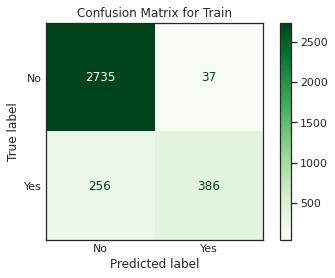

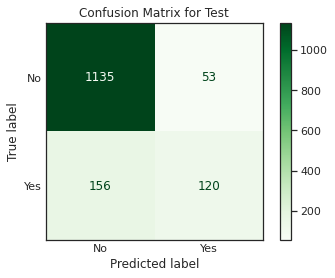

In [124]:
gbc_tuned_score=get_metrics_score(gbc_tuned,X_train,X_test,y_train,y_test)
add_score_model(gbc_tuned_score)

In [125]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
MonthlyIncome              0.29331
Age                        0.14855
Passport_1                 0.12045
Designation_Executive      0.09364
NumberOfTrips              0.05815
PreferredPropertyStar      0.04761
CityTier_3                 0.04426
MaritalStatus_Single       0.04385
MaritalStatus_Unmarried    0.02096
Occupation_Large Business  0.01820
Designation_Senior Manager 0.01778
Designation_Manager        0.01606
MaritalStatus_Married      0.01191
Gender_Male                0.01187
TypeofContact_Self Enquiry 0.01175
CityTier_2                 0.00896
NumberOfPersonVisiting     0.00842
NumberOfChildrenVisiting   0.00761
Occupation_Salaried        0.00663
Occupation_Small Business  0.00568
OwnCar_1                   0.00311
Designation_VP             0.00123


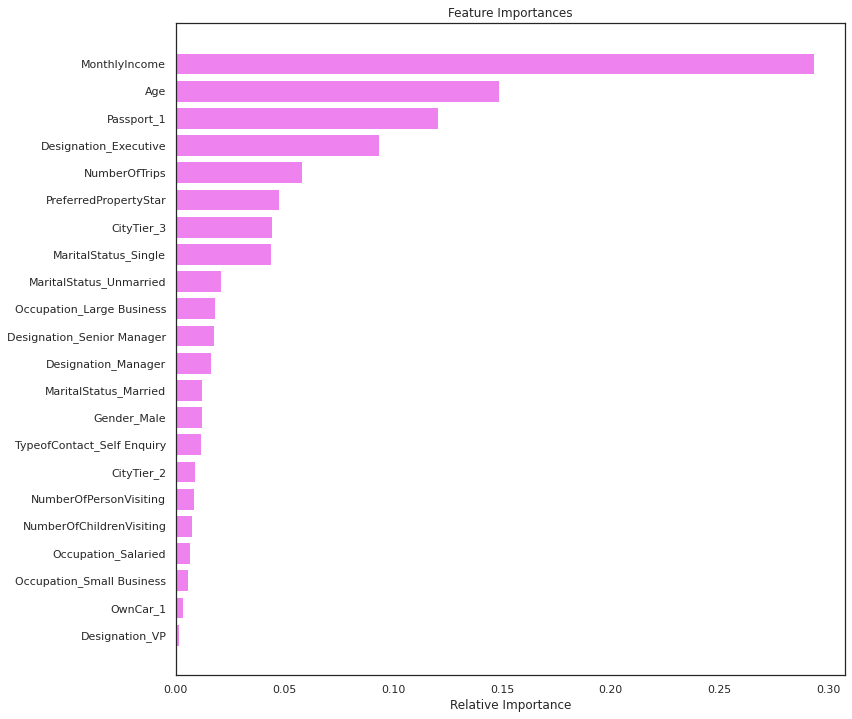

In [126]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In Tuned Gradient Boosting most most important features are Monthly income,Age,passport Desiginative executive, Number of trips,city tier 3.

#### Tuned XGBoost Classifier

In [201]:
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,5],
    "colsample_bylevel":[0.5,1],
    "learning_rate":[0.001,0.01,0.1,0.5]
}
acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.best_estimator_

xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.92794,0.84426,0.95639,0.72101,0.73798,0.56857,0.83311,0.63578


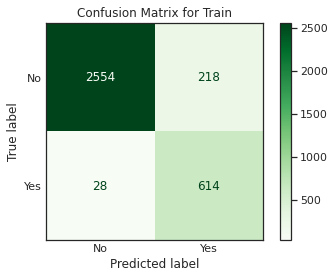

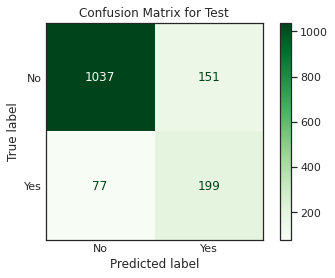

In [128]:
xgb_tuned_score=get_metrics_score(xgb_tuned,X_train,X_test,y_train,y_test)
add_score_model(xgb_tuned_score)


In [129]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Passport_1                 0.16037
Designation_Executive      0.12216
CityTier_3                 0.06087
MaritalStatus_Single       0.05643
Designation_Senior Manager 0.05249
Designation_Manager        0.05182
PreferredPropertyStar      0.04584
MaritalStatus_Unmarried    0.04319
Age                        0.03845
MaritalStatus_Married      0.03805
MonthlyIncome              0.03623
CityTier_2                 0.03598
NumberOfTrips              0.03371
Occupation_Large Business  0.02990
TypeofContact_Self Enquiry 0.02968
Occupation_Small Business  0.02870
Designation_VP             0.02722
Occupation_Salaried        0.02520
Gender_Male                0.02504
OwnCar_1                   0.02117
NumberOfPersonVisiting     0.01927
NumberOfChildrenVisiting   0.01822


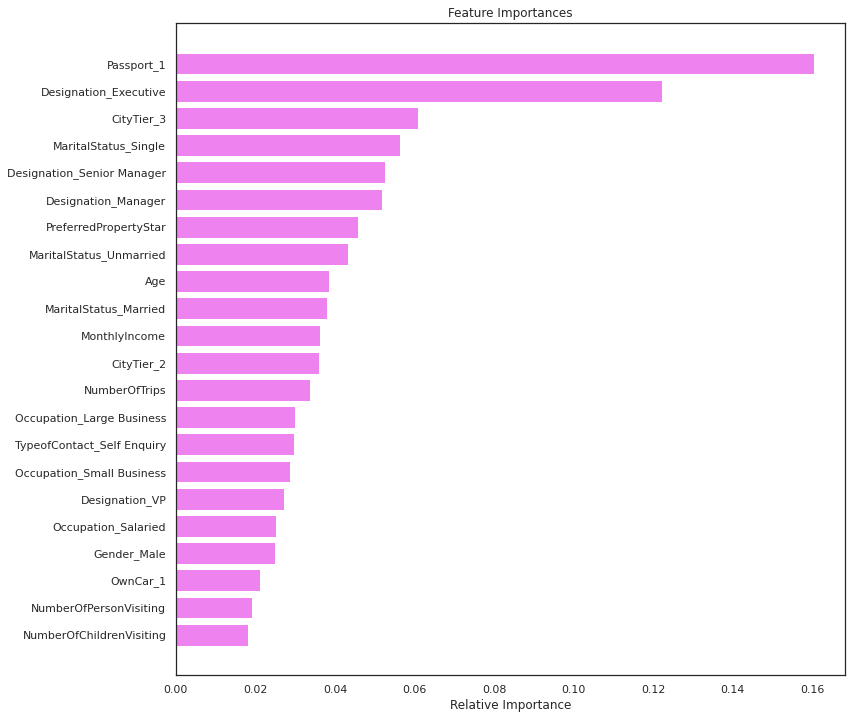

In [130]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In Tuned XGBoost most most important features are Monthly income,Age,passport Desigination as executive, Number of trips,city tier 3.

### Stacking Classifier

Building a stacking model with the tuned models - decision tree, random forest,Adaboosting and gradient boosting, then use XGBoost to get the final prediction

In [131]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),('AdaBoost',abc_tuned),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1,eval_metric='logloss')

In [132]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5,n_jobs=-1)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.2,
                                                                     1: 0.8},
                                                       max_depth=7,
                                                       max_leaf_nodes=15,
                                                       min_samples_leaf=2,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.2,
                                                                     1: 0.8},
                                                       max_depth=5,
                                                       max_samples=0.3,
                                                       min_samples_leaf=9,
                                                       n_estim

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.90920,0.84973,0.66822,0.50362,0.81559,0.62613,0.73459,0.55823


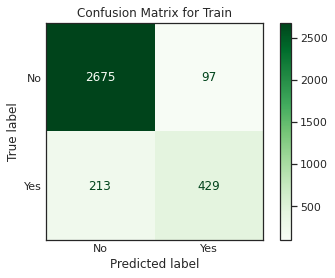

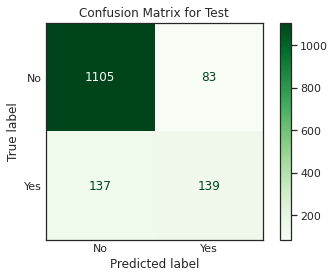

In [133]:
stacking_estimator=get_metrics_score(stacking_estimator,X_train,X_test,y_train,y_test)

In [134]:
add_score_model(stacking_estimator)

********************************************************************************************************************************
### Comparing all models

In [135]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Random Forest',
                                          'Bagging Classifier',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier',
                                          'AdaBoost',
                                          'Gradient Boost',
                                          'XGboost',
                                          'Tuned AdaBoost',
                                          'Tuned Gradient Boost',
                                          'Tuned XGboost','Stacking'
                                          ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
11,Tuned XGboost,0.92794,0.84426,0.95639,0.72101,0.73798,0.56857,0.83311,0.63578
3,Tuned Decision Tree,0.78559,0.76639,0.68069,0.66304,0.45332,0.42361,0.54421,0.51695
4,Tuned Random Forest,0.82484,0.81216,0.63707,0.62319,0.52842,0.50146,0.57768,0.55574
0,Decision Tree,1.00000,0.85246,1.00000,0.58696,1.00000,0.61364,1.00000,0.60000
8,XGboost,0.99531,0.89003,0.97508,0.55797,1.00000,0.79793,0.98738,0.65672
1,Random Forest,0.99033,0.88661,0.95327,0.51087,0.99512,0.81977,0.97375,0.62946
12,Stacking,0.90920,0.84973,0.66822,0.50362,0.81559,0.62613,0.73459,0.55823
2,Bagging Classifier,1.00000,0.88730,1.00000,0.48551,1.00000,0.85350,1.00000,0.61894
5,Tuned Bagging Classifier,0.99824,0.87910,0.99065,0.46014,1.00000,0.81935,0.99531,0.58933
10,Tuned Gradient Boost,0.91418,0.85724,0.60125,0.43478,0.91253,0.69364,0.72488,0.53452


### Inference:

* Tuned Decision Tree and Tuned Random Forest models  gives a more generalized model.
* XGboost and the Tuned XGboost seems to overfit. To get more generalized model, we can be look into tuning  XGboost with different parameters.
* With tune stacking with different weak learners which can help improve the performance and get a generalized model.
* We have seen the different features and in different models there it is not having an order. But the most often features are: having a passport, designation as executive, Age, MonthlyIncome, marital status as single.

********************************************************************************************************************************

## Conclusion 
*  When it comes to the relevance of features, The most crucial characteristics are designation, passport, tier city, marital status, and occupation. Income is another factor to consider; few other models place a greater emphasis on it.
- Gender,number of children visiting, and whether or not they had a car proved to be unimportant.

********************************************************************************************************************************

## Business Recommendations & Insights

From the data a predictive model has been built that:

a) The company can deploy to identify customers who will be interested in purchasing the Travel package.

b) The company  can use to find the key factors that will have an impact on a customer taking a product or not.

- Most important features that have an impact on Product taken: Desgination, Passport,TierCity,Martialstatus,occupation

- Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.
- Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.
- Based on EDA ,Factors from customer interaction data which can help in increasing the chances of the customer buying the travel package  are:
  - Having a higher duration of pitch by salesman to the customer.
  - Getting a PitchSatisfactionScore of 3 or 5.
  - Having multiple follow ups with the customers.
- Company should help and promote customers to get a passport , as we see having a passport increases the chances of customer accepting a package.
- Mostly Single customers are accpeting a package , reason may be married couples might has kids , provding a property , with child care services can get married couples to accept the product.

********************************************************************************************************************************